# Machine Learning untuk Aplikasi Geospasial

Bagian kedua dari tiga seri Geospatial Data Crash Course  ini akan membahas contoh-contoh aplikasi Machine Learning untuk bidang Geospasial. Pada [bagian pertama](https://colab.research.google.com/drive/1MyjuxE2O-3YX1Q0m6EMA6xrKeum6sETE?usp=sharing) telah dibahas mengenai dasar Geospatial Data Science dan penggunaan Python untuk keperluan pengolahan data spasial. Bagian kedua ini membahas mengenai *machine learning* yang diterapkan untuk beberapa contoh kasus pada bidang Geospasial.

## Pengantar

Machine learning adalah *'buzzword of the century'*. Beragam aplikasi yang kita saksikan sehari-hari saat ini adalah bagian dari produk yang dihasilkan oleh machine learning. Machine learning merupakan bagian dari bidang Artificial Intelligence yang memberikan komputer kemampuan untuk belajar dari data yang dimasukkan kepada mesin untuk dipelajari. Selanjutnya, mesin dapat menentukan pola dan memuat jawaban dari pertanyaan yang diajukan.

![](https://i.redd.it/f1uzd9twkwb61.jpg)


Machine learning saat ini diterapkan pada hampir semua bidang, termasuk pada bidang geospasial. Pada notebook ini akan diberikan contoh mengenai bagaimana machine learning dapat digunakan dalam keperluan analisis spasial, khususnya ketika mengolah data dalam jumlah besar.





## Studi Kasus

Pada bagian ini akan diberikan beberapa Contoh studi kasus untuk dilakukan. Penjelasan untuk tiap kode dapat dijumpai sebagai komentar maupun baris paragraf yang diberikan sebelumnya.

### Teachable Machine 

Teachable Machine merupakan antarmuka untuk mesin Machine Learning yang dibuat oleh Google untuk memudahkan pemahaman mengenai cara kerja Machine Learning. Di belakang layar, Teachable Machine menggunakan Tensorflow untuk membuat model dari data yang dimasukkan oleh pengguna. 

![](https://scx2.b-cdn.net/gfx/news/2019/teachablemac.gif)

Pada latihan berikut kita akan menggunakan Teachable Machine untuk melatin mesin ini mengenali beberapa kelas data yang berbeda. Prosedurnya cukup mudah:

1. Unduh data untuk latihan klasifikasi. Anda dapat menggunakan data berikut:

> https://drive.google.com/file/d/1fgtwpGIh5lWv0H4FOwmFm_dtdURqSzax/view?usp=sharing

2. Buka website Teachable Machine: https://teachablemachine.withgoogle.com/

3. Buat kelas. Kelas-kelas ini dibuat sesuai dengan jenis hewan, misalnya ayam, sapi, dst.

4. Lakukan training untuk membuat model.

5. Gunakan gambar baru untuk melakukan prediksi. Misalnya gambar seperti berikut:

{}(https://static.dw.com/image/47863948_303.jpg)

Lihat apakah mesin berhasil mendeteksi objek tersebut sebagai seekor sapi.





### Menggunakan Scikit-Learn

Scikit-Learn merupakan modul Python yang digunakan untuk keperluan pemodelan, analisis statistik serta pembuatan machine learning. Scikit-Learn memiliki modul yang sangat lengkap untuk keperluan machine learning, sekaligus menyediakan kemampuan untuk melakukan modifikasi dan tuning parameter model machine learning yang dikembangkan sendiri.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)



Penjelasan mengenai Scikit Learn sendiri dapat dijumpai lebih lengkap pada dokumentasi yang tersedia. Pada contoh di bawah ini, kita akan melakukan klasifikasi sederhana menggunakan classifier MeanShift. Detilnya dapat dilihat pada:

https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html

In [65]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

Pertama, kita akan buat data random sebagai masukan untuk klasifikasi. Data ini dapat dibuat menggunakan fungsi `make_blobs` pada scikit learn, seperti berikut:

In [109]:
# membuat data sampel
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

Pada data di atas dapat kita lihat bahwa kita meminta scikit learn untuk memuat 10000 data dengan standar deviasi 0.6. Kita dapat mengganti data ini dengan data lainnya, misalnya data covid yang kita gunakan di minggu sebelumnya.

MeanShift merupakan salah satu metode untuk melakukan klasifikasi dari serangkaian data menggunakan metode unsupervised learning. Terlebih dahulu kita perlu membuat bandwith yang menyatakan nilai kuantil dan besaran sampel yang akan digunakan pada tiap klasifikasi, seperti berikut:

In [110]:
# menghitung clustering dengan MeanShift

# Menghitung Bandwith
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# unsupervised machine learning
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 3


Selanjutnya, kita dapat mencoba menampilkan hasil klustering yang kita buat. Kita gunakan Matplotlib untuk keperluan plotting dan melihat bagaimana hasil klasifikasi yang dibuat oleh SKLearn.

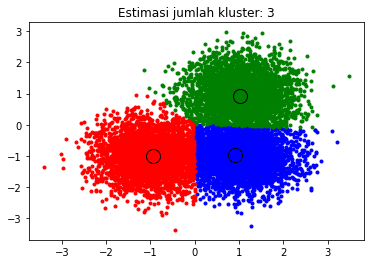

In [111]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimasi jumlah kluster: %d' % n_clusters_)
plt.show()

Dari contoh di atas, kita dapat gunakan model klasifikasi unsupervised ini pada berbagai data lain. Klasifikasi jenis ini banyak digunakan sebagai data masukan pada klasifikasi supervised. 

**Sebagai latihan**, gunakan metode MeanShift di atas untuk membuat klasifikasi dari berbagai data lain yang dapat Anda temukan, misalnya data Covid atau data gempa bumi dari latihan sebelumnya.

### Melakukan Analisis Spasial dengan Machine Learning

Pada latihan ini, kita akan lakukan contoh analisis spasial yang sederhana dengan menggunakan Machine Learning, khususnya modul Scikit-Learn pada Python. Kita akan gunakan metode [Ball Tree](https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940) yang merupakan salah satu algoritma Nearest Neighbor untuk analisis titik terdekat.

Pada latihan ini kita akan banyak menggunakan modul Python dengan nama [OSMNX](https://osmnx.readthedocs.io/en/stable/osmnx.html). Modul ini digunakan untuk berinteraksi dengan data OSM agar dapat langsung digunakan dan dianalisis di Python. Untuk itu kita perlu melakukan instalasi modul ini terlebih dahulu.

> Analisisnya: Carilah bangunan (rumah) yang paling dekat dengan titik-titik sekolah di Kota Sleman

In [69]:
!pip install osmnx

Selanjutnya, kita akan gunakan modul ini untuk memanggil titik-titik POI dari OSM ke dalam Google Colab:

In [112]:
# memanggil modul
import osmnx as ox

all_pois = ox.geometries_from_place(
            'Sleman, ID',
            tags = {'amenity':True})

all_pois['amenity'].value_counts()

place_of_worship      26
school                18
clinic                12
police                 4
restaurant             4
marketplace            4
fuel                   4
atm                    3
parking_space          3
community_centre       2
social_facility        2
motorcycle_parking     1
library                1
bank                   1
courthouse             1
townhall               1
kindergarten           1
cafe                   1
hospital               1
ice_cream              1
Name: amenity, dtype: int64

Dari data di atas, kita akan coba panggil titik-titik sekolah:

In [71]:
# Run query
sekolah = ox.geometries_from_place(
            'Sleman, ID',
            tags = {'amenity':'school'},
            which_result=1)

sekolah.head()

,unique_id,osmid,element_type,amenity,name,geometry,religion,nodes,building,building:levels,building:roof,building:structure,building:use,building:walls,wheelchair,school:type_idn,alt_name,isced:level
0,node/1361205677,1361205677,node,school,MTS N Sleman,POINT (110.34106 -7.71269),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/1364438005,1364438005,node,school,SMP 2 Sleman,POINT (110.34274 -7.69025),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/1364438080,1364438080,node,school,SMP Kanisius Sleman,POINT (110.34234 -7.68944),christian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/2004886528,2004886528,node,school,SMK YPKK,POINT (110.34882 -7.70051),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/2130483746,2130483746,node,school,MI Al Ihsan,POINT (110.34016 -7.67447),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# berapa jumlah sekolah di Sleman?
sekolah['osmid'].count()

18

Demikian pula, kita panggil bangunan. Kali ini kita panggil sebagai poligon:

In [114]:
bangunan_gdf = ox.geometries_from_place(
            'Sleman, ID',
            tags = {'building':True})

bangunan_gdf.head()

,unique_id,osmid,element_type,amenity,building,name,opening_hours,religion,geometry,addr:full,capacity,content,man_made,operator,source,nodes,building:levels,building:roof,building:structure,building:use,building:walls,leisure,sport,height,social_facility:for,addr,atm,roof:colour,roof:height,roof:shape,access,covered,surface,denomination,brand,access:roof,building:condition,building:floor,building:material,capacity:persons,alt_name,roof:orientation,healthcare,operator:type,addr:postcode,addr:street,school:type_idn,addr:city,addr:place,addr:province,marketplace:authority,marketplace:type,ways,type
0,node/1360237977,1360237977,node,place_of_worship,mosque,Masjid Agung Sleman,24/7,muslim,POINT (110.35530 -7.71438),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/1361166353,1361166353,node,place_of_worship,mosque,NaN,NaN,muslim,POINT (110.35599 -7.71841),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/2004848178,2004848178,node,NaN,yes,KODIM SLEMAN,NaN,NaN,POINT (110.33987 -7.68310),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/5864963383,5864963383,node,NaN,storage_tank,SPBE PT. Jatirata Mitra Mulya,NaN,NaN,POINT (110.33666 -7.67678),jl raya caturharjo,50 mton,gas,storage_tank,jatirata,survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/121525425,121525425,way,NaN,yes,NaN,NaN,NaN,"POLYGON ((110.34698 -7.69741, 110.34711 -7.697...",NaN,NaN,NaN,NaN,NaN,NaN,"[1360229990, 1360229955, 1360229984, 136022990...",1,tile,reinforced_masonry,place_of_worship,brick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berapa jumlahnya?

In [115]:
bangunan_gdf['osmid'].count()

29880

Terdapat 29.880 bangunan yang kita peroleh. Kita coba tampilkan data tersebut, bagaimana distribusi datanya?

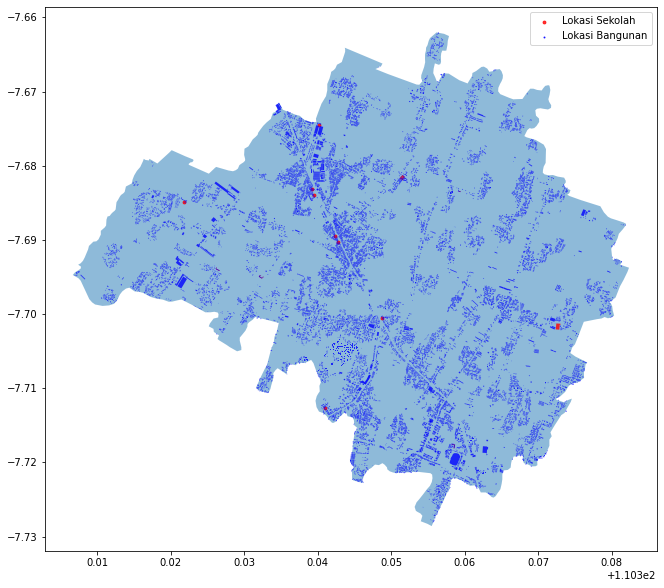

In [116]:
# Download London's Boundary
sleman = ox.geocoder.geocode_to_gdf('Sleman, ID')

# Set up a plot axis
fig, ax = plt.subplots(figsize = (15,10))

# Visualise both on the plot
sleman.plot(ax = ax, alpha = 0.5)
sekolah.plot(ax = ax, markersize = 8, color = 'red', alpha = 0.8, label = 'Lokasi Sekolah')
bangunan_gdf.plot(ax = ax, markersize = 1, color = 'blue', alpha = 0.8, label = 'Lokasi Bangunan')
plt.legend()

Saatnya melakukan analisis Machine Learning. Fungsi berikut kita gunakan untuk melakukan analisis Nearest Neighbor pada titik bangunan dan sekolah:

In [88]:
from sklearn.neighbors import BallTree
import numpy as np

def get_nearest(src_points, candidates, k_neighbors=1):
    """Menentukan NN dari dua"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=15, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[0]
    closest_dist = distances[0]

    # Return indices and distances
    return (closest, closest_dist)


def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.

    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """

    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name

    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)

    # Parse coordinates from points and insert them into a numpy array as RADIANS
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.centroid.x * np.pi / 180, geom.centroid.y * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.centroid.x * np.pi / 180, geom.centroid.y * np.pi / 180)).to_list())

    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in meters)

    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)

    # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
    closest_points = right.loc[closest]

    # Ensure that the index corresponds the one in left_gdf
    closest_points = closest_points.reset_index(drop=True)

    # Add distance if requested
    # --ini adalah haversine distance--
    if return_dist:
        # Convert to meters from radians
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius

    return closest_points

Kita coba tampilkan waktu yang digunakan oleh mesin ini untuk menganalisis menggunakan fungsi di atas. Perintah `%%time` digunakan untuk keperluan ini

In [117]:
# mulai analisis. berapa waktunya?
%%time
closest_points = nearest_neighbor(bangunan_gdf, sekolah, return_dist=True)

CPU times: user 1.32 s, sys: 0 ns, total: 1.32 s
Wall time: 1.33 s


Hasilnya?

In [100]:
# Melihat hasilnya:
closest_points

,unique_id,osmid,element_type,amenity,name,geometry,religion,nodes,building,building:levels,building:roof,building:structure,building:use,building:walls,wheelchair,school:type_idn,alt_name,isced:level,distance
0,way/121654650,121654650,way,school,SD N denggung,"POLYGON ((110.35825 -7.71752, 110.35824 -7.717...",NaN,"[1361179119, 1361179174, 1361179167, 136117917...",yes,1,tile,confined_masonry,education,brick,NaN,NaN,NaN,NaN,383.380652
1,way/121654650,121654650,way,school,SD N denggung,"POLYGON ((110.35825 -7.71752, 110.35824 -7.717...",NaN,"[1361179119, 1361179174, 1361179167, 136117917...",yes,1,tile,confined_masonry,education,brick,NaN,NaN,NaN,NaN,284.443507
2,node/3320084561,3320084561,node,school,SMP 1 Sleman,POINT (110.33946 -7.68396),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.523568
3,node/3320084661,3320084661,node,school,SMA 1 Sleman,POINT (110.33923 -7.68309),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.118245
4,node/2004886528,2004886528,node,school,SMK YPKK,POINT (110.34882 -7.70051),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.037962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29875,way/121654650,121654650,way,school,SD N denggung,"POLYGON ((110.35825 -7.71752, 110.35824 -7.717...",NaN,"[1361179119, 1361179174, 1361179167, 136117917...",yes,1,tile,confined_masonry,education,brick,NaN,NaN,NaN,NaN,115.939315
29876,way/121654650,121654650,way,school,SD N denggung,"POLYGON ((110.35825 -7.71752, 110.35824 -7.717...",NaN,"[1361179119, 1361179174, 1361179167, 136117917...",yes,1,tile,confined_masonry,education,brick,NaN,NaN,NaN,NaN,110.430668
29877,node/2004886528,2004886528,node,school,SMK YPKK,POINT (110.34882 -7.70051),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408.570256
29878,node/2004886528,2004886528,node,school,SMK YPKK,POINT (110.34882 -7.70051),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478.036597


Scroll ke kanan untuk melihat bahwa tiap data telah dihitung jaraknya, antara sekolah dan bangunan di Sleman. Kita bisa cek apakah seluruh titik sudah dihitung:

In [90]:
print(len(closest_points), '==', len(bangunan_gdf))

29880 == 29880


Gabungkan hasil ini menggunakan Left Join. Geopandas dapat kita gunakan untuk keperluan ini:

In [103]:
# Rename the geometry of closest stops gdf so that we can easily identify it
closest_points = closest_points.rename(columns={'geom': 'closest_stop_geom'})

# Merge the datasets by index (for this, it is good to use '.join()' -function)
bangunan_gdf = bangunan_gdf.join(closest_points, how = 'left', lsuffix = '_left', rsuffix = '_right')

# Let's see what we have
bangunan_gdf.head()

,unique_id_left,osmid_left,element_type_left,amenity_left,building_left,name_left,opening_hours,religion_left,geometry_left,addr:full,capacity,content,man_made,operator,source,nodes_left,building:levels_left,building:roof_left,building:structure_left,building:use_left,building:walls_left,leisure,sport,height,social_facility:for,addr,atm,roof:colour,roof:height,roof:shape,access,covered,surface,denomination,brand,access:roof,building:condition,building:floor,building:material,capacity:persons,alt_name_left,roof:orientation,healthcare,operator:type,addr:postcode,addr:street,school:type_idn_left,addr:city,addr:place,addr:province,marketplace:authority,marketplace:type,ways,type,unique_id_right,osmid_right,element_type_right,amenity_right,name_right,geometry_right,religion_right,nodes_right,building_right,building:levels_right,building:roof_right,building:structure_right,building:use_right,building:walls_right,wheelchair,school:type_idn_right,alt_name_right,isced:level,distance
0,node/1360237977,1360237977,node,place_of_worship,mosque,Masjid Agung Sleman,24/7,muslim,POINT (110.35530 -7.71438),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way/121654650,121654650,way,school,SD N denggung,"POLYGON ((110.35825 -7.71752, 110.35824 -7.717...",NaN,"[1361179119, 1361179174, 1361179167, 136117917...",yes,1,tile,confined_masonry,education,brick,NaN,NaN,NaN,NaN,383.380652
1,node/1361166353,1361166353,node,place_of_worship,mosque,NaN,NaN,muslim,POINT (110.35599 -7.71841),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way/121654650,121654650,way,school,SD N denggung,"POLYGON ((110.35825 -7.71752, 110.35824 -7.717...",NaN,"[1361179119, 1361179174, 1361179167, 136117917...",yes,1,tile,confined_masonry,education,brick,NaN,NaN,NaN,NaN,284.443507
2,node/2004848178,2004848178,node,NaN,yes,KODIM SLEMAN,NaN,NaN,POINT (110.33987 -7.68310),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node/3320084561,3320084561,node,school,SMP 1 Sleman,POINT (110.33946 -7.68396),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.523568
3,node/5864963383,5864963383,node,NaN,storage_tank,SPBE PT. Jatirata Mitra Mulya,NaN,NaN,POINT (110.33666 -7.67678),jl raya caturharjo,50 mton,gas,storage_tank,jatirata,survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node/3320084661,3320084661,node,school,SMA 1 Sleman,POINT (110.33923 -7.68309),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.118245
4,way/121525425,121525425,way,NaN,yes,NaN,NaN,NaN,"POLYGON ((110.34698 -7.69741, 110.34711 -7.697...",NaN,NaN,NaN,NaN,NaN,NaN,"[1360229990, 1360229955, 1360229984, 136022990...",1,tile,reinforced_masonry,place_of_worship,brick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node/2004886528,2004886528,node,school,SMK YPKK,POINT (110.34882 -7.70051),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.037962


Kita juga dapat menerapkan statistik sederhana untuk menghitung berbagai parameter:

In [104]:
bangunan_gdf['distance'].describe()

count    29880.000000
mean       437.339847
std        226.266271
min          0.000000
25%        262.302510
50%        419.713412
75%        586.081842
max       1695.880020
Name: distance, dtype: float64

Terakhir, kita akan gunakan beberapa modul untuk menampilkan klasifikasi data. Mapclassify digunakan untuk keperluan ini, sehingga perlu kita install terlebih dahulu:

In [81]:
## install mapclassify
!pip install mapclassify

Kemudian, kita tampilkan seperti berikut:

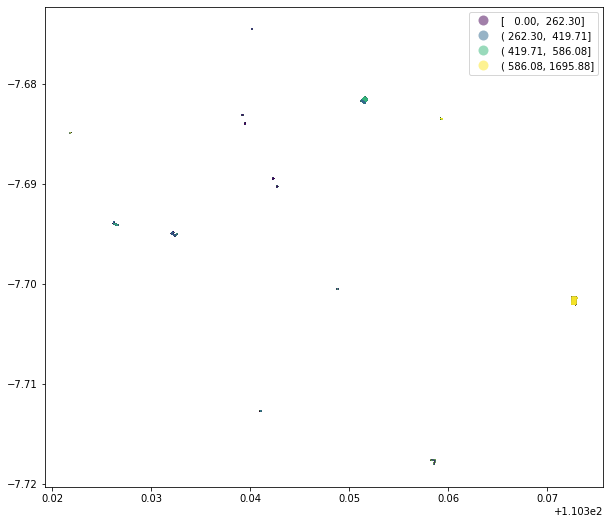

In [106]:
closest_points.plot(column='distance', markersize=0.2, alpha=0.5, figsize=(10,10), scheme='quantiles', k=4,
               legend=True)

Dengan demikian kita telah melakukan analisis untuk melihat bagaimana machine learning dapat kita gunakan untuk melakukan analisis pencarian lokasi dengan lebih mudah dan lebih cepat. 

**Sebagai Latihan**, lakukan analisis yang sama pada berbagai data yang berbeda: di kota lain dengan jenis 'amenities' OSM yang berbeda. Bagaimana hasilnya?

## Rujukan

* https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b 
* https://medium.com/spatial-data-science/deep-learning-for-geospatial-data-applications-multi-label-classification-2b0a1838fcf3
* https://automating-gis-processes.github.io/site/notebooks/L3/nearest-neighbor-faster.html
* https://colab.research.google.com/github/sentinel-hub/eo-learn/blob/master/examples/land-cover-map/SI_LULC_pipeline.ipynb